In [24]:
from architectures import *
from data import get_dataframe, get_generators, get_image

import numpy as np

In [71]:
df = get_dataframe()

train, validate, test = get_generators(
    df[df["HAS_PICTURE"] & df["LOG_MEAN_I"] > 0],
    batch_size=10,
    colorspace="rgb"
)

model, mid = architecture_05()
model.load_weights("./models/MID005_2017-07-05-23-40-11/weights.07-0.40.hdf5")

x_test = np.zeros((10000, 244, 244, 3))
y_test = np.zeros((10000,1))
for i in range(0,1000):
    features, labels = next(validate["data"])
    x_test[i*10:(i+1)*10,:,:,:] = features
    y_test[i*10:(i+1)*10,0] = labels

pred = model.predict(x_test)
    
print(np.max(pred))
print(np.min(pred))

8.7914
5.55722


0.5
-0.5
255
0


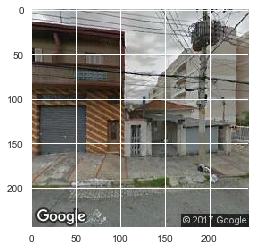

In [72]:
img_orig = np.array(get_image(355030801000001,1))

def normalize(img):
    return ((img/255)-0.5).astype(np.float64)

def denormalize(img):
    return ((img+0.5)*255.0).astype(np.uint8)

img_norm = normalize(img_orig)
img_out = denormalize(img_norm)

plt.imshow(img_out)

diff = img_out - img_orig

print(img_norm.max())
print(img_norm.min())

print(diff.max())
print(diff.min())


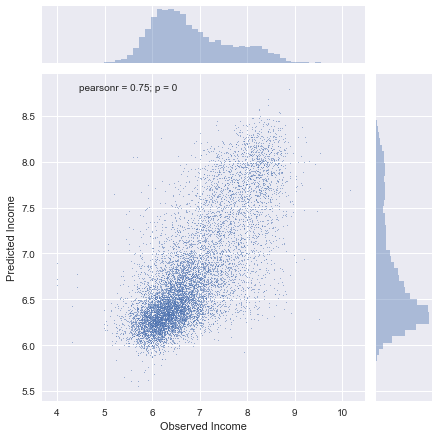

In [73]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(32,32))
sns.jointplot(x=y_test,y=pred, s=0.2).set_axis_labels("Observed Income","Predicted Income")

In [74]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function

[ 8.79139805] 6577.421303882782
32
0 0.0667018231004


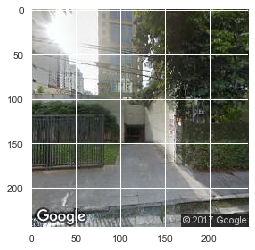

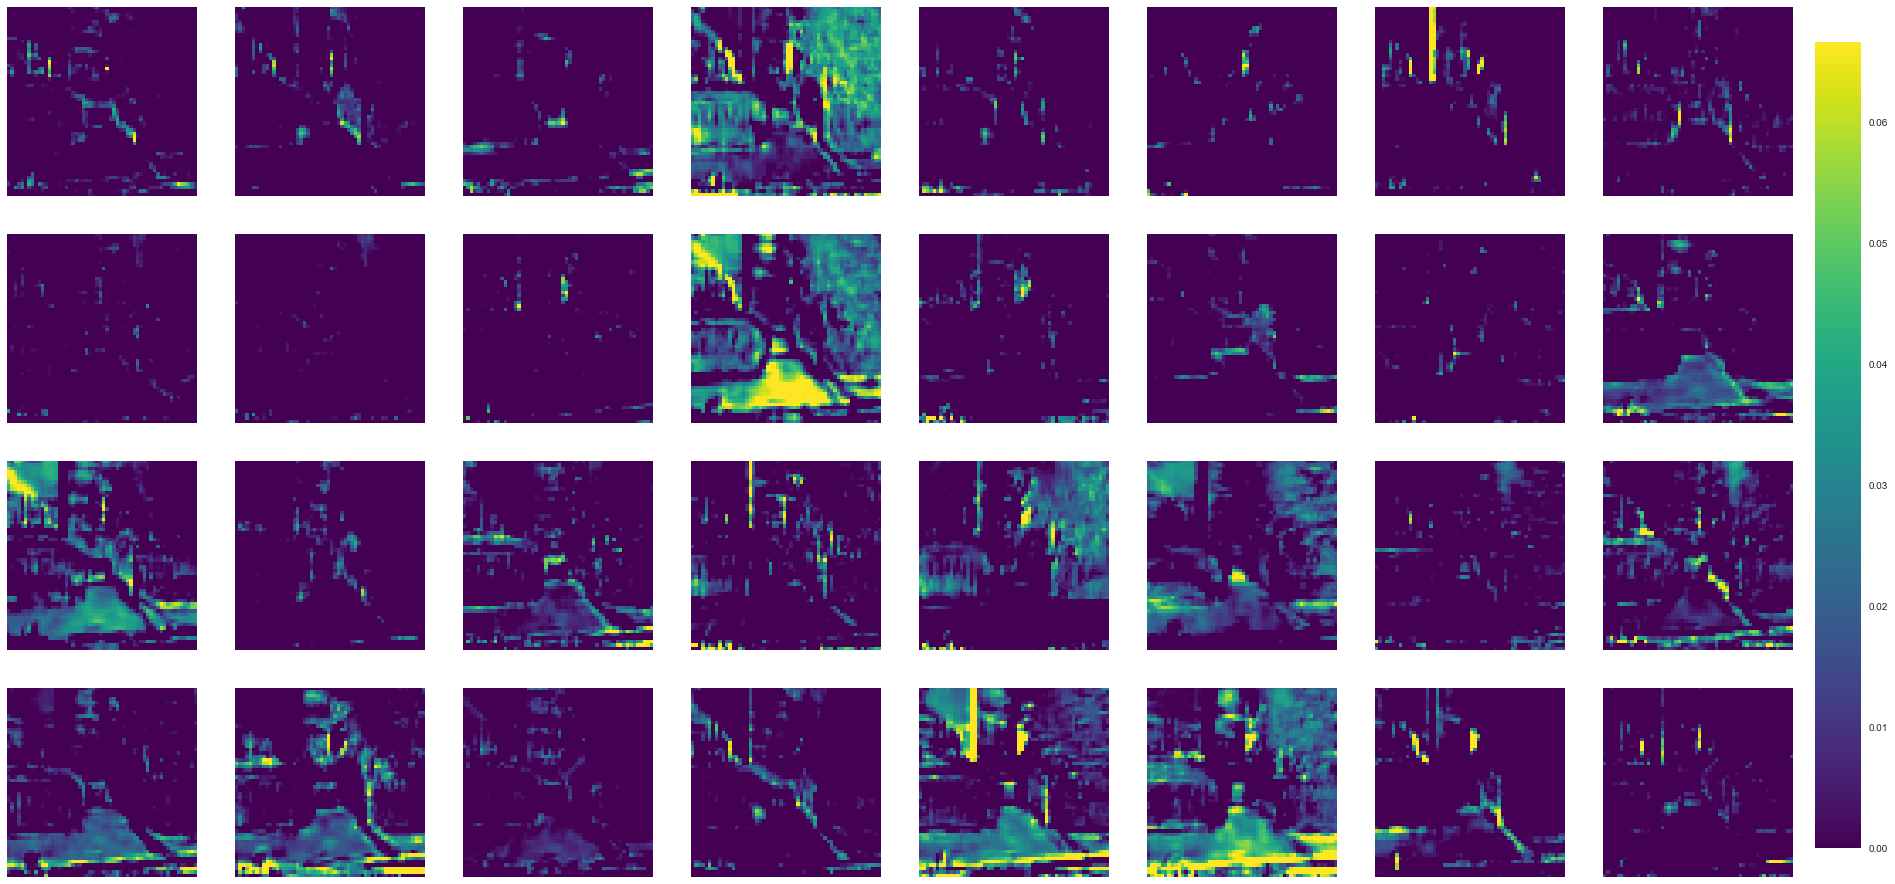

In [83]:
%matplotlib inline
from math import exp, ceil

layer = 11

iid = np.argmax(pred)
print(pred[iid], exp(pred[iid]))
test_image = x_test[iid:iid+1]
plt.imshow(((test_image[0]*255)+128).astype(np.uint8))

layer_outs = functor([test_image, 1.])
activations = np.array(layer_outs[layer])[0]
#n_kernels = activations.shape[2]
n_kernels = 32
print(n_kernels)

vmin = 0
vmax = np.percentile(activations, 99)

print(vmin,vmax)

if len(activations.shape) == 1:
    activations = activations.reshape((32,32))
    fig, ax = plt.subplots(1, 1, figsize=(4,4))
    ax.imshow(activations, cmap="viridis")
    ax.grid(False)
else:
    nrows = ceil(n_kernels/8)
    fig, ax = plt.subplots(nrows, 8, figsize=(32,4*nrows))
    for i in range(0,nrows):
        for j in range(0,8):
            im = ax[i,j].imshow(activations[:,:,8*i+j],cmap="viridis", vmin=vmin, vmax=vmax)
            ax[i,j].grid(False)
            ax[i,j].set_xticklabels([])
            ax[i,j].set_yticklabels([])
    fig.subplots_adjust(right=0.9)
    cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)

In [335]:
activations.shape

(25, 25, 256)

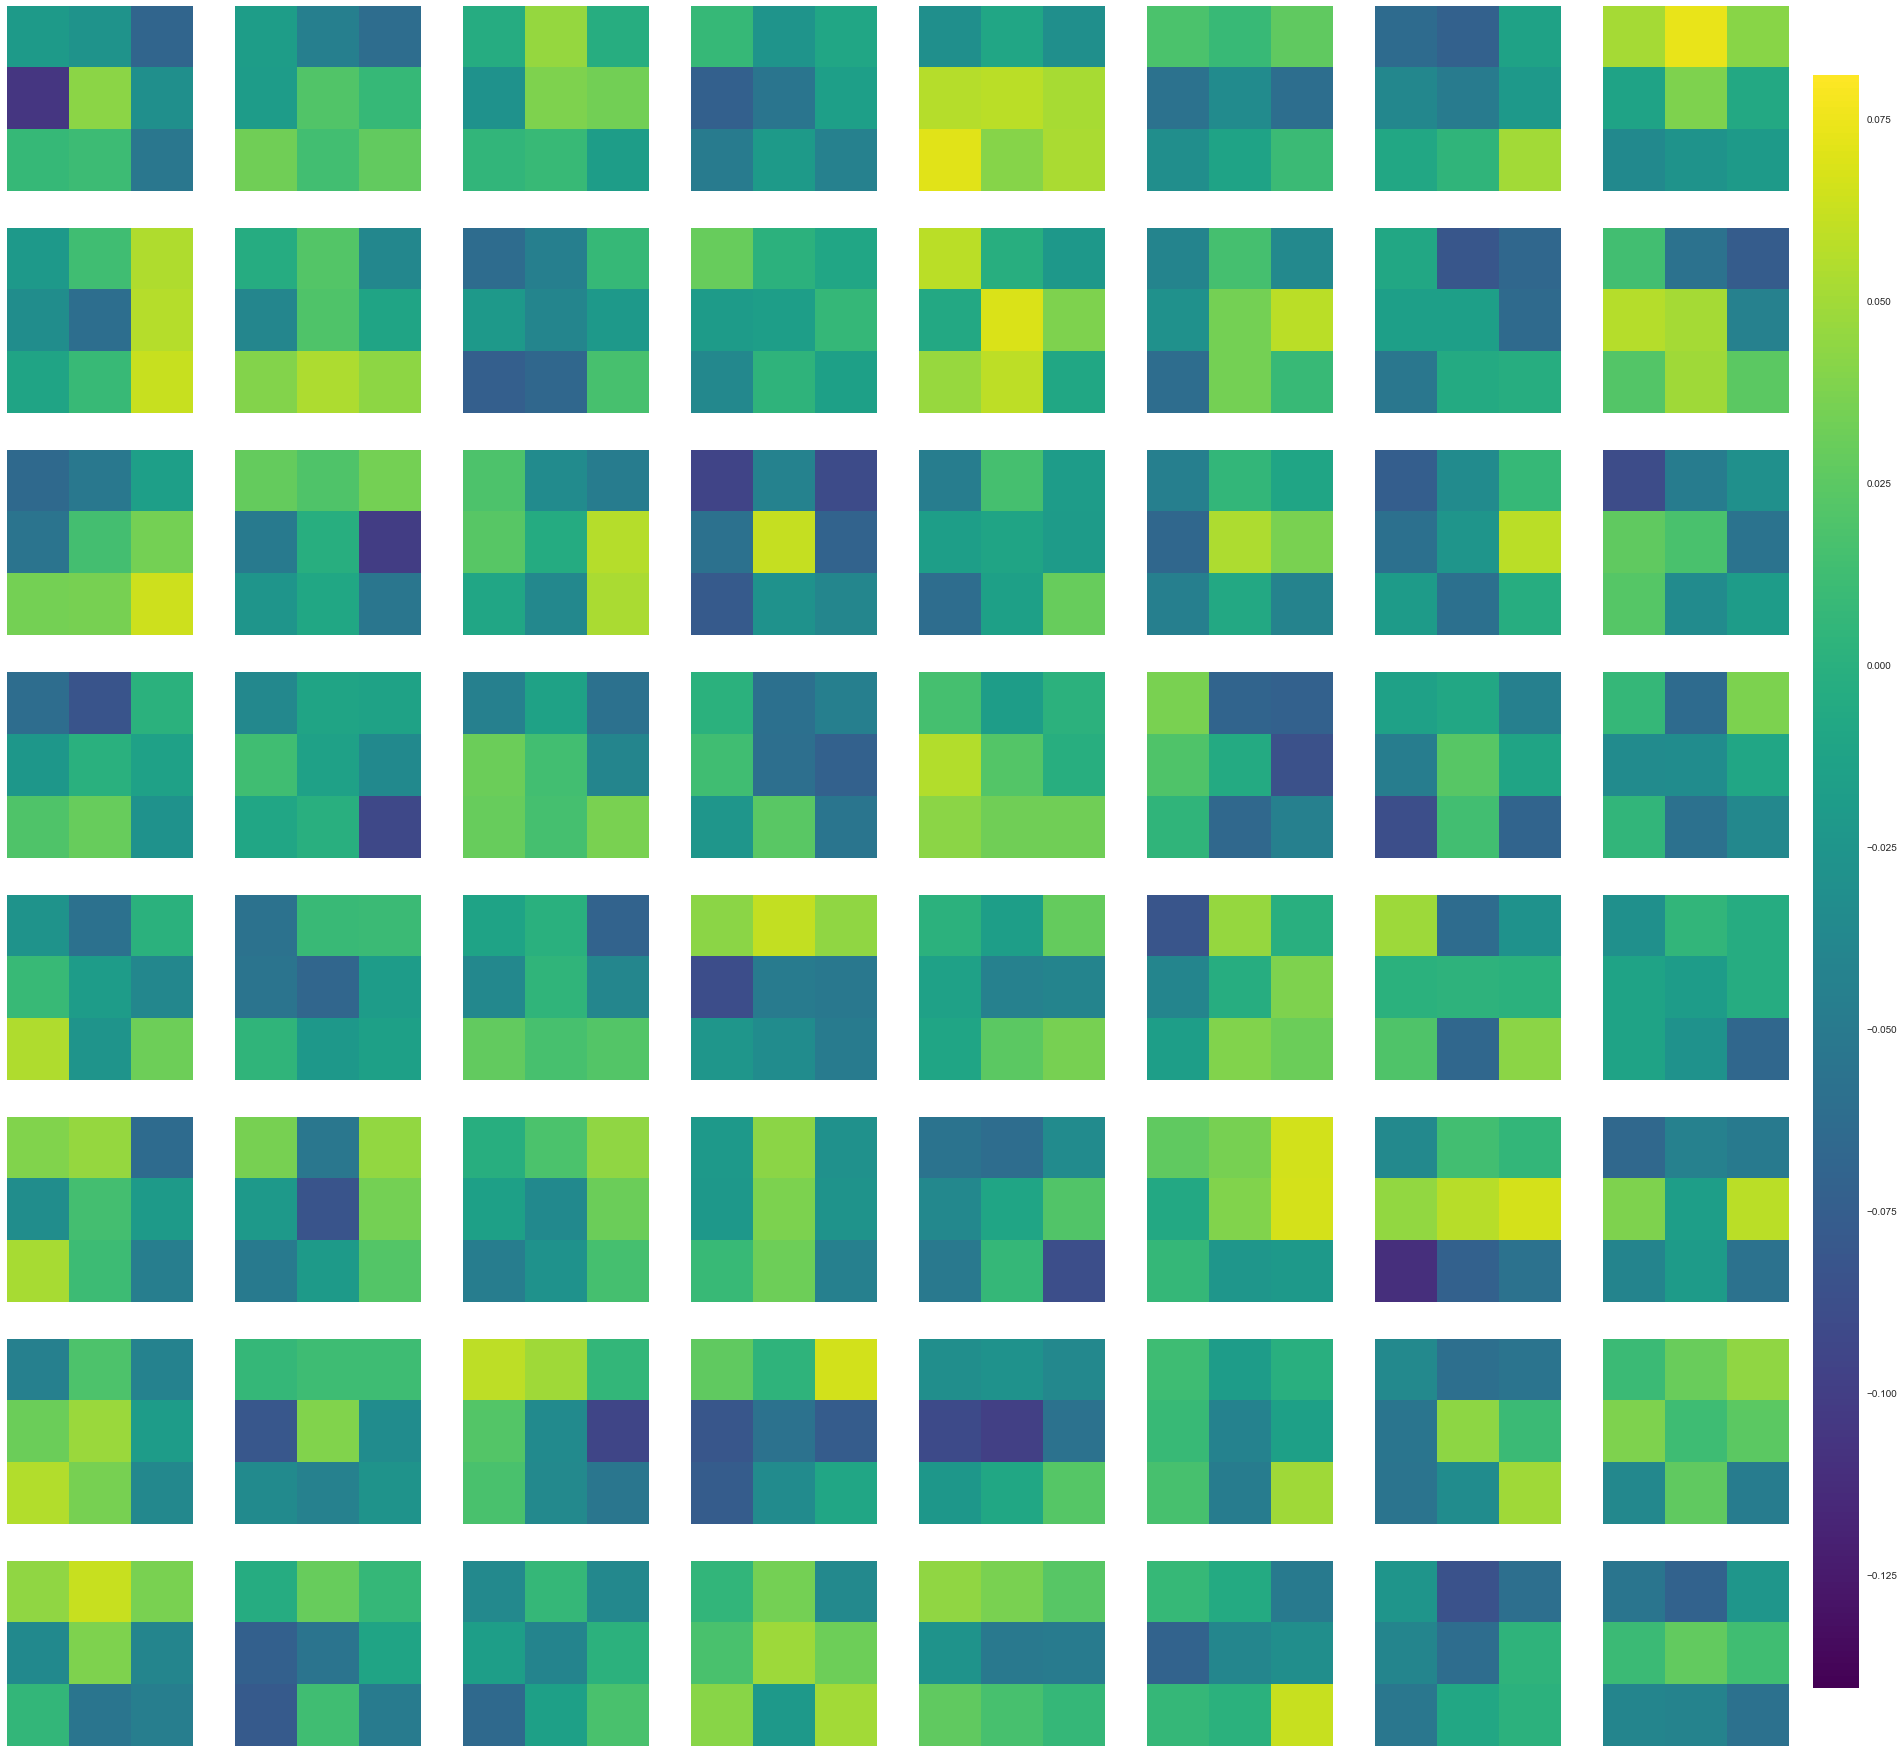

In [326]:
weights = model.layers[1].get_weights()[0]

fig, ax = plt.subplots(8, 8, figsize=(32,32))
vmax = weights[:,:,0,:].max()
vmin = weights[:,:,0,:].min()
for i in range(0,8):
    for j in range(0,8):        
        im = ax[i,j].imshow(weights[2,:,:,8*i+j], cmap="viridis", vmax=vmax, vmin=vmin)
        ax[i,j].grid(False)
        ax[i,j].set_xticklabels([])
        ax[i,j].set_yticklabels([])        
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)        

In [300]:
weights = model.layers[1].get_weights()[0]
weights.shape

(3, 3, 3, 64)

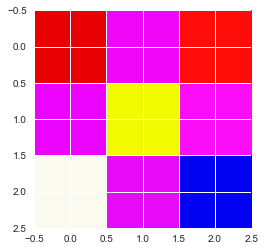

In [305]:
plt.imshow(weights[:,:,:,0])

In [ ]:
class ImageTransform(object):
    def __init__(rotation_range=None, flip = False, )